# "Esses dados são viciados?" estrelando pandas e scipy.stats

![](die_400.png)

Apresentação de Danilo J. S. Bellini para o canal Live de Python. Vídeo da apresentação: https://youtu.be/UsNH6rBibwg

Contato:

|||
|:-|:-|
|GitHub|https://github.com/danilobellini|
|Twitter|@danilobellini|
|SlideShare|https://slideshare.com/djsbellini|
|Facebook|https://facebook.com/djsbellini|

Repositórios no GitHub com notebooks:

- [notebooks](https://github.com/danilobellini/notebooks): Diversificado, possui desde tutorial de Jupyter até a prova do teorema central do limite (estatística)
- [scientific-literature](https://github.com/danilobellini/scientific-literature): Avançado, para quem tem um interesse acadêmico em estatística / machine learning

Grupo de estudos de ciência dos dados no Garoa Hacker Clube: [Garoa 95](groups.google.com/group/garoa95).
O nome do grupo é uma referência ao número de graus de liberdade no artigo do Fisher de 1936 referenciado no repositório [scientific-literature](https://github.com/danilobellini/scientific-literature)).

## Lançamentos do dado de 10 lados!

![](dice_d10_100.png)

Antes de começar a live, eu lancei $200$ este dado de 10 lados e anotei os resultados:

In [1]:
with open("200_lancamentos.txt") as f:
    values = list(f.read().strip())

In [2]:
values

['0',
 '3',
 '0',
 '1',
 '9',
 '0',
 '2',
 '7',
 '2',
 '0',
 '6',
 '9',
 '6',
 '8',
 '3',
 '4',
 '5',
 '3',
 '9',
 '5',
 '0',
 '5',
 '5',
 '4',
 '8',
 '2',
 '2',
 '7',
 '6',
 '6',
 '2',
 '4',
 '9',
 '5',
 '9',
 '4',
 '3',
 '7',
 '2',
 '2',
 '7',
 '1',
 '9',
 '1',
 '5',
 '7',
 '4',
 '4',
 '3',
 '2',
 '1',
 '1',
 '2',
 '1',
 '1',
 '4',
 '9',
 '2',
 '3',
 '8',
 '4',
 '2',
 '7',
 '7',
 '3',
 '0',
 '8',
 '1',
 '4',
 '9',
 '1',
 '2',
 '7',
 '6',
 '9',
 '7',
 '5',
 '7',
 '4',
 '1',
 '6',
 '3',
 '4',
 '8',
 '1',
 '2',
 '1',
 '3',
 '2',
 '2',
 '6',
 '4',
 '0',
 '1',
 '6',
 '8',
 '9',
 '5',
 '3',
 '8',
 '2',
 '2',
 '8',
 '1',
 '5',
 '5',
 '9',
 '7',
 '6',
 '8',
 '2',
 '2',
 '9',
 '0',
 '1',
 '3',
 '5',
 '9',
 '1',
 '3',
 '1',
 '5',
 '3',
 '9',
 '5',
 '3',
 '0',
 '5',
 '1',
 '4',
 '0',
 '5',
 '7',
 '9',
 '9',
 '2',
 '9',
 '5',
 '8',
 '6',
 '2',
 '5',
 '5',
 '7',
 '7',
 '5',
 '1',
 '1',
 '7',
 '1',
 '8',
 '7',
 '6',
 '5',
 '9',
 '1',
 '0',
 '8',
 '7',
 '5',
 '2',
 '2',
 '5',
 '6',
 '4',
 '6',
 '1'

Nosso objetivo é responder à pergunta: com essas informações coletadas, esse dado é viciado/tendencioso?

### Pandas

Ao invés de uma lista, podemos representá-lo como uma instância de `pd.Series`:

In [3]:
import pandas as pd

In [4]:
data = pd.Series(map(int, values))

In [5]:
data

0      0
1      3
2      0
3      1
4      9
5      0
6      2
7      7
8      2
9      0
10     6
11     9
12     6
13     8
14     3
15     4
16     5
17     3
18     9
19     5
20     0
21     5
22     5
23     4
24     8
25     2
26     2
27     7
28     6
29     6
      ..
170    5
171    0
172    5
173    7
174    4
175    5
176    2
177    8
178    9
179    6
180    9
181    7
182    5
183    7
184    1
185    3
186    1
187    3
188    9
189    3
190    9
191    0
192    5
193    7
194    7
195    5
196    6
197    3
198    4
199    3
Length: 200, dtype: int64

Por que agora a representação parece ter 2 colunas?

O Pandas conta com $2$ estruturas de dados principais:

|Classe|Interpretação|
|:-|:-|
|`pd.Series`|uma "coluna" de uma tabela|
|`pd.DataFrame`|uma tabela|

O que vimos acima foi uma única coluna de dados, exposta em conjunto com seus índices. Índices são similares a uma coluna mas estão estruturalmente separados dos valores das colunas. O ideal é pensar nesses índices como o resultado de algo como:

```python
    for idx, val in enumerate(iterable):
        print idx, val
```

O iterável `iterable` contém os valores, mas os índices foram exibidos em conjunto. Na prática, o índice também pode ser manipulado, mas, por hora, basta saber que essa coluna extra à esquerda é uma referência da "linha" e ela sempre aparece.

### Frequência

Para efetuar a avaliação se o dado é viciado, realizaremos um [teste de qui-quadrado de Pearson](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test), especificamente o teste de "goodness of fit". Nesse teste, o primeiro passo é a coleta das frequências de ocorrência de cada um dos resultados possíveis. O Pandas pode nos ajudar nisso:

In [6]:
counts = data.value_counts().sort_index()
counts

0    14
1    26
2    25
3    19
4    16
5    28
6    15
7    22
8    13
9    22
dtype: int64

Os valores dos índices (esquerda) representam o número do lado do dado, e a coluna (direita) representa a fequência de ocorrência (número de vezes em que o número apareceu nos dados). Isso foi feito com o método `value_counts`, o `sort_index` apenas ordenou o resultado.

Vamos visualizar isso com Pandas e a integração com o Matplotlib! Os objetos das classes citadas do Pandas possuem um atributo `plot` que possui os métodos para cada um dos tipos de plot integrados.

In [7]:
# Necessário para que os plots sejam exibidos no Jupyter!
# Use "notebook" no lugar de "inline" para plots interativos.
%matplotlib inline

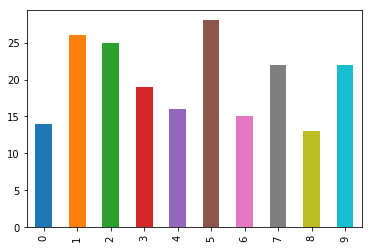

In [8]:
# Dica: use o ponto-e-vírgula para evitar exibir uma saída "ruidosa" desnecessariamente
counts.plot.bar();

Para plots mais sofisticados a partir de `pd.DataFrame` e `pd.Series`, veja o [seaborn](http://seaborn.pydata.org/).

O esperado (dado não viciado) era ter uma distribuição uniforme (todos os valores iguais). Mas o lado $5$ apareceu com o dobro da frequência do lado $0$! O quanto distante isso está da distribuição uniforme?

### Calculando a estatística $\chi^2$

A equação da estatística "qui-quadrado", a qual iremos calcular, é:

$$\chi^2 = \sum \frac{\left( Observado - Esperado \right)^2}{Esperado}$$

Em outras palavras, a soma do erros quadráticos (com relação ao esperado) dividida pelo próprio valor esperado. Vamos calcular isso usando os métodos do Pandas:

In [9]:
counts.sum() # Somatório

200

In [10]:
counts.mean() # Média (somatório dividido pelo número de elementos)

20.0

In [11]:
counts.mean() - counts # "Erros" absolutos

0    6.0
1   -6.0
2   -5.0
3    1.0
4    4.0
5   -8.0
6    5.0
7   -2.0
8    7.0
9   -2.0
dtype: float64

In [12]:
(counts.mean() - counts) ** 2 # "Erros" quadráticos (numerador da equação)

0    36.0
1    36.0
2    25.0
3     1.0
4    16.0
5    64.0
6    25.0
7     4.0
8    49.0
9     4.0
dtype: float64

Finalmente:

In [13]:
chi_squared = ((counts.mean() - counts) ** 2 / counts.mean()).sum()
chi_squared

13.0

Agora o que fazemos com isso? Poderíamos consultar [uma tabela da distribuição qui-quadrado](https://people.richland.edu/james/lecture/m170/tbl-chi.html) e ver um valor de probabilidade associado à hipótese nula... pera, que hipótese? Tabela? Por que essa tabela fala em "graus de liberdade"? Distribuição de probabilidades!?

O objetivo é testar se o dado é viciado ou não, já temos duas hipóteses, e testamos ela verificando se essa estatística recém-obtida ultrapassa um certo limiar, o qual podemos encontrar em uma tabela com valores de uma distribuição de probabilidades.

### Distribuições de probabilidades com o scipy.stats

Uma distribuição de probabilidades é uma função cuja área (integral) em seu domínio é $1$. Vamos usar o SciPy e o Matplotlib para visualizar uma tal distribuição, começando por algo mais simples, por exemplo a distribuição normal (também conhecida como gaussiana).

In [14]:
# O scipy possui diversos módulos/subpackages independentes,
# similares às "toolkits" do MatLab,
# mas voltadas ao uso das estruturas de dados do numpy.
# Aqui usaremos apenas a parte de estatística, o scipy.stats:
from scipy import stats

In [15]:
import numpy as np

In [16]:
import matplotlib.pyplot as plt

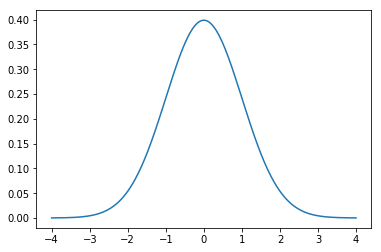

In [17]:
xs = np.linspace(-4, 4, 500)
ys = stats.norm.pdf(xs)
plt.plot(xs, ys);

O `scipy.stats` possui objetos como `norm`, `t` e `chi2`, os quais representam distribuições estatísticas. Esses objetos possuem métodos para a obtenção de valores da distribuição, seja da densidade de probabilidades (`pdf`), da densidade cumulativa (`cdf`), ou de outras, incluindo inversas. Isso torna prático o processo de realizar testes de hipótese sem nunca precisar consultar uma tabela manualmente.

Mas, com qui-quadrado, ao rodar...

```python
xs = np.linspace(-4, 4, 500)
ys = stats.chi2.pdf(xs)
plt.plot(xs, ys);
```

obtemos algo como...

```
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-112-6c9a1dabf2a8> in <module>()
      1 xs = np.linspace(-4, 4, 500)
----> 2 ys = stats.chi2.pdf(xs)
      3 plt.plot(xs, ys);

/usr/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py in pdf(self, x, *args, **kwds)
   1646 
   1647         """
-> 1648         args, loc, scale = self._parse_args(*args, **kwds)
   1649         x, loc, scale = map(asarray, (x, loc, scale))
   1650         args = tuple(map(asarray, args))

TypeError: _parse_args() missing 1 required positional argument: 'df'
```

Esse parâmetro `df` faltante é o número de graus de liberdade. O que são graus de liberdade?

### Graus de liberdade

Qual o número de graus de liberdade? Essa é talvez seja a parte mais confusa que há em testes de hipótese!

Os valores observados de frequência foram:

In [18]:
# Podemos acessar os valores (a coluna) como array do numpy
counts.values

array([14, 26, 25, 19, 16, 28, 15, 22, 13, 22])

E o esperado para a distribuição uniforme (dado não-viciado) era:

In [19]:
np.repeat(counts.mean(), counts.count())

array([20., 20., 20., 20., 20., 20., 20., 20., 20., 20.])

Com essa informação, um dos números observados tornou-se "fixo". Suponha que o $22$ ao final fosse desconhecido, um valor `x` qu desejamos descobrir. Repetindo a operação, sabemos que o valor da soma dos outro nove números é $178$:

In [20]:
counts.values[:-1].sum()

178

Se a soma de todos os valores é $178 + x$ e a média é $20$, temos:

$$
\frac{178 + x}{10} = 20
$$

Assim obtemos o valor de $x$:

In [21]:
200 - 178

22

Se tivéssemos trocado algum valor observado por outro, o valor de $x$ mudaria, mas seria ainda assim determinado. As demais frequências observadas são "livres", mas esse único valor, por conta do uso da média amostral, é fixo.

Dizer que *as demais frequências observadas são "livres"* significa exatamente o que queremos no momento: o número de graus de liberdade é:

$$df = N - 1$$

In [22]:
df = counts.count() - 1
df

9

Podemos visualizar a distribuição de qui-quadrado associada a esse parâmetro ($9$ graus de liberdade), tanto a função densidade de probabilidades (área unitária, `pdf`), como a função acumulada/cumulativa (sua integral, `cdf`):

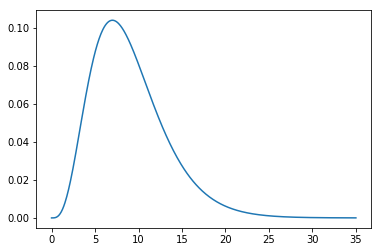

In [23]:
xs = np.linspace(0, 35, 500)
ys = stats.chi2.pdf(xs, df)
plt.plot(xs, ys);

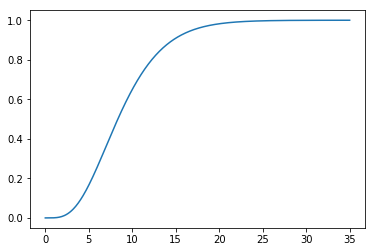

In [24]:
xs = np.linspace(0, 35, 500)
ys = stats.chi2.cdf(xs, df)
plt.plot(xs, ys);

Ok, temos uma distribuição de probabilidades, e agora?

### Teste de hipótese

Há duas hipóteses:

- Hipótese nula ($H_0$): o dado não é viciado/tendencioso (foi o que modelamos como "esperado" no cálculo do $\chi^2$);
- Hipótese alternativa ($H_A$): o dado é viciado/tendencioso.

Queremos saber se podemos rejeitar a hipótese nula. Tipicamente, definimos isso de acordo com o cálculo de um valor $p$, uma probabilidade associada à hipótese nula, com o seguinte critério:

- $p \geq \alpha \rightarrow$ Retemos a hipótese nula (não temos evidência o suficiente para rejeitá-la);
- $p < \alpha \rightarrow$ Rejeitamos a hipótese nula (há significância estatística).

O valor de $\alpha$ é tipicamente $0.05$, $0.01$, $0.005$ ou $0.001$. Para o nosso caso, vamos adotar $\alpha = 0.05$.

As probabilidades podem ser calculadas com a função `sf` (*survival function*, `1 - cdf`), a qual existe no scipy.stats:

In [25]:
p = stats.chi2.sf(chi_squared, df)
p

0.16260626219029953

Com esse valor de $p$, não podemos dizer que o dado é viciado. Porém, para um dado convencional, esse é um valor bem baixo. O que tentamos estimar aqui foi o quão provável é um dado justo (distribuição uniforme) gerar as frequências observadas, essa probabilidade não é alta, mas também não é baixa o suficiente para dizermos com significância estatística que o dado é viciado.

Podemos visualizar isso graficamente. Para isso, vamos encontrar o limiar do qui-quadrado a partir do valor de $\alpha$ fornecido usando a inversa da `sf`:

In [26]:
alpha = .05
x_alpha = stats.chi2.isf(alpha, df)
x_alpha

16.91897760462045

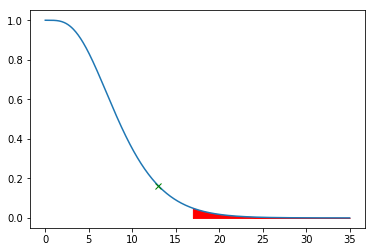

In [27]:
xs = np.linspace(0, 35, 500)
ys = stats.chi2.sf(xs, df)
plt.plot(xs, ys)
plt.fill_between(xs[xs > x_alpha], ys[xs > x_alpha], color="r")
plt.plot([chi_squared], [p], "gx");

O `x` verde é a estatística que obtivemos, a região em vermelho é a de rejeição da hipótese nula, o que acontece para valores de $\chi^2$ (qui-quadrado) acima dos $~16.92$.

## Outros dados? Random.org!

O http://random.org diz coletar informações aleatórias por meio de equipamentos que coletam o ruído atmosférico. Usando a API gratuita deles, obtive $1000$ inteiros de $1$ a $6$ (similar a um dado de $6$ lados) para efetuar o mesmo teste, e salvei em um CSV (usando o próprio Pandas com o método `to_csv`). Para ler esse arquivo:

In [28]:
f = pd.read_csv("first.csv")
f

,value
0,1
1,4
2,5
3,5
4,1
5,1
6,6
7,6
8,3
9,4


Provavelmente o `pd.read_csv` é a função mais conhecida do Pandas! Ela lê um arquivo CSV e converte em um `pd.DataFrame` (que o Jupyter exibe como tabela), identificando automaticamente os tipos de dados (números inteiros, nesse caso).

Para acessar uma coluna de um `pd.DataFrame`, podemos usar tanto o acesso a item `data_frame["nome_coluna"]` como o acesso a atributo `data_frame.nome_coluna`. No Jupyter, é conveniente usar o acesso como atributo para ter o auto-complete, mas depois mudar para o acesso como item pelo fato da maioria das tabelas não seguir a PEP8 (e também para evitar confusões ao acessar outros atributos que "mascaram" colunas por conta do nome).

In [29]:
f["value"] is f.value

True

In [30]:
type(f["value"])

pandas.core.series.Series

### Frequências dos dados do random.org

Vamos efetuar o mesmo teste nesse novo conjunto de observações! A primeira coisa é obter as frequências:

In [31]:
fc = f["value"].value_counts().sort_values() # Também podemos ordenar por valores!
fc

3    157
1    159
2    166
6    169
5    172
4    177
Name: value, dtype: int64

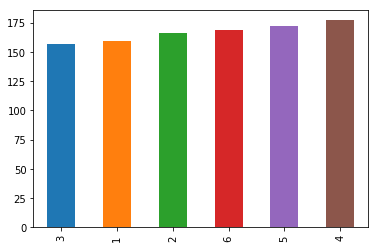

In [32]:
fc.plot.bar();

### Teste de $\chi^2$ de Pearson

Há uma forma mais direta no `scipy.stats` de efetuar esse teste: passar o vetor (iterável) de frequências para o `scipy.stats.chisquare`:

In [33]:
stats.chisquare(fc)

Power_divergenceResult(statistic=1.76, pvalue=0.8812557605796127)

Os mesmos valores da estatística $\chi^2$ e do valor de $p$ calculados "na unha", como anteriormente:

In [34]:
fc_chi2 = ((fc - fc.mean()) ** 2 / fc.mean()).sum()
fc_chi2

1.76

In [35]:
stats.chi2.sf(fc_chi2, fc.count() - 1)

0.8812557605796127

Um $p$ de mais de 88% indica que as frequências obtidas são bastante prováveis, considerando a distribuição uniforme como esperada (hipótese nula), algo muito distantes de justificar vício/tendência (hipótese alternativa).

Fim dos testes de hipóteses!

## Material extra: Pokédex

Podemos usar o Pandas para web scraping.

No https://pokemondb.net há uma tabela com informações sobre todos os Pokémons existentes até o momento. Vamos coletar essa tabela!

In [36]:
import requests

In [37]:
resp = requests.get("https://pokemondb.net/pokedex/all")

Da forma como a biblioteca `requests` funciona, temos um HTML como uma string em `resp.text`. Vamos ler o conteúdo com o `pd.read_html`, que busca por tabelas (tags `table`, `tr`, `td`, `th`, etc.) explicitadas no HTML.

In [38]:
list_result = pd.read_html(resp.text)
type(list_result)

list

O resultado é uma lista de instâncias de `pd.DataFrame`, uma para cada tabela encontrada. Há apenas uma nessa página:

In [39]:
len(list_result)

1

In [40]:
table = list_result[0]
table

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,GrassPoison,318,45,49,49,65,65,45
1,2,Ivysaur,GrassPoison,405,60,62,63,80,80,60
2,3,Venusaur,GrassPoison,525,80,82,83,100,100,80
3,3,VenusaurMega Venusaur,GrassPoison,625,80,100,123,122,120,80
4,4,Charmander,Fire,309,39,52,43,60,50,65
5,5,Charmeleon,Fire,405,58,64,58,80,65,80
6,6,Charizard,FireFlying,534,78,84,78,109,85,100
7,6,CharizardMega Charizard X,FireDragon,634,78,130,111,130,85,100
8,6,CharizardMega Charizard Y,FireFlying,634,78,104,78,159,115,100
9,7,Squirtle,Water,314,44,48,65,50,64,43


Assim como ocorreu com o CSV, o Pandas automaticamente identifica o tipo de dado de cada coluna:

In [41]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 10 columns):
#          917 non-null int64
Name       917 non-null object
Type       917 non-null object
Total      917 non-null int64
HP         917 non-null int64
Attack     917 non-null int64
Defense    917 non-null int64
Sp. Atk    917 non-null int64
Sp. Def    917 non-null int64
Speed      917 non-null int64
dtypes: int64(8), object(2)
memory usage: 71.7+ KB


Estatísticas descritivas para cada coluna não-categórica:

In [42]:
table.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,399.930207,438.146129,69.546347,80.056707,74.532170,73.199564,72.315158,68.496183
std,235.970035,120.350210,26.074785,32.586115,31.237579,33.179584,27.839761,29.439288
min,1.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,196.000000,330.000000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000
50%,395.000000,455.000000,66.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,608.000000,517.000000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,807.000000,780.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


### Quebrando strings

A coluna *Type* deveria ter tags, mas da forma como o Pandas importou, as tags ficaram unidas em UpperCamelCase, mas cada palavra deveria ser uma tag.

```
snake_case
lowerCamelCase
UpperCamelCase
```

Como fazer para separar a string `"UpperCamelCase"` em `["Upper", "Camel", "Case"]` de uma forma simples?

In [43]:
import re

In [44]:
re.findall("([A-Z][a-z]*)", "UpperCamelCase")

['Upper', 'Camel', 'Case']

Outra forma de escrever

In [45]:
ucc_splitter = re.compile("([A-Z][a-z]*)").findall
ucc_splitter("UpperCamelCase")

['Upper', 'Camel', 'Case']

### Manipulando uma coluna

Esta é a coluna que queremos corrigir:

In [46]:
table["Type"]

0         GrassPoison
1         GrassPoison
2         GrassPoison
3         GrassPoison
4                Fire
5                Fire
6          FireFlying
7          FireDragon
8          FireFlying
9               Water
10              Water
11              Water
12              Water
13                Bug
14                Bug
15          BugFlying
16          BugPoison
17          BugPoison
18          BugPoison
19          BugPoison
20       NormalFlying
21       NormalFlying
22       NormalFlying
23       NormalFlying
24             Normal
25         DarkNormal
26             Normal
27         DarkNormal
28       NormalFlying
29       NormalFlying
            ...      
887        GhostGrass
888            Dragon
889    DragonFighting
890    DragonFighting
891     ElectricFairy
892      PsychicFairy
893        GrassFairy
894        WaterFairy
895           Psychic
896           Psychic
897      PsychicSteel
898      PsychicGhost
899        RockPoison
900       BugFighting
901       

O método `pd.Series.apply` pode ser utilizado para aplicar uma função em todos os elementos, por exemplo, para pegar a primeira letra de cada elemento, basta:

In [47]:
table["Type"].apply(lambda x: x[0])

0      G
1      G
2      G
3      G
4      F
5      F
6      F
7      F
8      F
9      W
10     W
11     W
12     W
13     B
14     B
15     B
16     B
17     B
18     B
19     B
20     N
21     N
22     N
23     N
24     N
25     D
26     N
27     D
28     N
29     N
      ..
887    G
888    D
889    D
890    D
891    E
892    P
893    G
894    W
895    P
896    P
897    P
898    P
899    R
900    B
901    B
902    E
903    S
904    G
905    D
906    P
907    P
908    P
909    P
910    S
911    F
912    P
913    P
914    R
915    F
916    E
Name: Type, Length: 917, dtype: object

Por padrão, as operações não são in-place, isso significa que estamos criando um novo objeto `pd.Series`. Podemos usar a regex de antes para quebrar as tags em listas:

In [48]:
table["Type"].apply(re.compile("([A-Z][a-z]*)").findall)

0         [Grass, Poison]
1         [Grass, Poison]
2         [Grass, Poison]
3         [Grass, Poison]
4                  [Fire]
5                  [Fire]
6          [Fire, Flying]
7          [Fire, Dragon]
8          [Fire, Flying]
9                 [Water]
10                [Water]
11                [Water]
12                [Water]
13                  [Bug]
14                  [Bug]
15          [Bug, Flying]
16          [Bug, Poison]
17          [Bug, Poison]
18          [Bug, Poison]
19          [Bug, Poison]
20       [Normal, Flying]
21       [Normal, Flying]
22       [Normal, Flying]
23       [Normal, Flying]
24               [Normal]
25         [Dark, Normal]
26               [Normal]
27         [Dark, Normal]
28       [Normal, Flying]
29       [Normal, Flying]
              ...        
887        [Ghost, Grass]
888              [Dragon]
889    [Dragon, Fighting]
890    [Dragon, Fighting]
891     [Electric, Fairy]
892      [Psychic, Fairy]
893        [Grass, Fairy]
894        [

E criar uma nova tabela com essa coluna modificada:

In [49]:
table2 = table.copy()
table2["Type"] = table["Type"].apply(re.compile("([A-Z][a-z]*)").findall)
table2

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,"[Grass, Poison]",318,45,49,49,65,65,45
1,2,Ivysaur,"[Grass, Poison]",405,60,62,63,80,80,60
2,3,Venusaur,"[Grass, Poison]",525,80,82,83,100,100,80
3,3,VenusaurMega Venusaur,"[Grass, Poison]",625,80,100,123,122,120,80
4,4,Charmander,[Fire],309,39,52,43,60,50,65
5,5,Charmeleon,[Fire],405,58,64,58,80,65,80
6,6,Charizard,"[Fire, Flying]",534,78,84,78,109,85,100
7,6,CharizardMega Charizard X,"[Fire, Dragon]",634,78,130,111,130,85,100
8,6,CharizardMega Charizard Y,"[Fire, Flying]",634,78,104,78,159,115,100
9,7,Squirtle,[Water],314,44,48,65,50,64,43


Também seria possível fazer de maneira menos imperativa com `table.assign(Type=table["Type"].apply(re.compile("([A-Z][a-z]*)").findall))`.

Para agrupamento, isso não adianta muito, não podemos fazer `table2.groupby("Type").describe()` pelo fato de que as listas não são hasheable, e isso seria equivalente a fazer io agrupamento por *Type* na tabela original:

In [50]:
table.groupby("Type").describe()

#                                                        \
               count        mean         std    min     25%    50%     75%   
Type                                                                         
Bug             18.0  382.166667  225.083841   10.0  265.25  357.5  609.00   
BugElectric      4.0  666.500000   81.985771  595.0  595.75  666.5  737.25   
BugFairy         2.0  742.500000    0.707107  742.0  742.25  742.5  742.75   
BugFighting      4.0  504.250000  335.152080  214.0  214.00  504.0  794.25   
BugFire          2.0  636.500000    0.707107  636.0  636.25  636.5  636.75   
BugFlying       14.0  286.285714  173.829903   12.0  165.25  275.5  414.75   
BugGhost         1.0  292.000000         NaN  292.0  292.00  292.0  292.00   
BugGrass         6.0  354.833333  243.925740   46.0  138.50  476.5  540.75   
BugGround        2.0  351.500000   86.974134  290.0  320.75  351.5  382.25   
BugPoison       12.0  199.166667  222.750506   13.0   15.00  108.0  337.50   
BugRock          3.0  442.666667  198.897796  213.0  385.00  557.0  557.50   
BugSteel         7.0  416.000000  207.619845  205.0  212.00  413.0  610.50   
BugWater         3.0  606.000000  279.726652  283.0  525.00  767.0  767.50   
Dark            12.0  349.500000  186.900314   52.0  245.00  359.0  509.25   
DarkDragon       4.0  675.250000   82.504040  633.0  633.75  634.5  676.00   
DarkFighting     2.0  559.500000    0.707107  559.0  559.25  559.5  559.75   
DarkFire         3.0  228.666667    0.577350  228.0  228.50  229.0  229.00   
DarkFlying       5.0  520.800000  208.908353  198.0  430.00  629.0  630.00   
DarkGhost        2.0  302.000000    0.000000  302.0  302.00  302.0  302.00   
DarkIce          2.0  338.000000  173.948268  215.0  276.50  338.0  399.50   
DarkNormal       2.0   19.500000    0.707107   19.0   19.25   19.5   19.75   
DarkPsychic      2.0  686.500000    0.707107  686.0  686.25  686.5  686.75   
DarkSteel        2.0  624.500000    0.707107  624.0  624.25  624.5  624.75   
Dragon          12.0  532.416667  218.701731  147.0  371.75  611.5  704.25   
DragonElectric   1.0  644.000000         NaN  644.0  644.00  644.0  644.00   
DragonFairy      1.0  334.000000         NaN  334.0  334.00  334.0  334.00   
DragonFighting   2.0  783.500000    0.707107  783.0  783.25  783.5  783.75   
DragonFire       1.0  643.000000         NaN  643.0  643.00  643.0  643.00   
DragonFlying     6.0  332.833333   91.933490  149.0  343.75  373.0  381.25   
DragonGround     7.0  561.571429  146.327096  443.0  444.50  445.0  718.00   
...              ...         ...         ...    ...     ...    ...     ...   
RockIce          2.0  698.500000    0.707107  698.0  698.25  698.5  698.75   
RockPoison       1.0  793.000000         NaN  793.0  793.00  793.0  793.00   
RockPsychic      2.0  337.500000    0.707107  337.0  337.25  337.5  337.75   
RockSteel        4.0  525.500000  188.874738  410.0  410.75  443.5  558.25   
RockWater        6.0  322.500000  283.504321  138.0  139.25  140.5  551.25   
Steel            5.0  497.000000  143.382356  306.0  379.00  599.0  600.00   
SteelDragon      1.0  483.000000         NaN  483.0  483.00  483.0  483.00   
SteelFairy       4.0  528.500000  263.197644  303.0  303.00  505.0  730.50   
SteelFighting    1.0  638.000000         NaN  638.0  638.00  638.0  638.00   
SteelFlying      2.0  512.000000  403.050865  227.0  369.50  512.0  654.50   
SteelGhost       4.0  680.250000    0.957427  679.0  679.75  680.5  681.00   
SteelGround      2.0  208.000000    0.000000  208.0  208.00  208.0  208.00   
SteelPsychic     7.0  394.142857   29.162925  374.0  375.50  376.0  410.50   
SteelRock        3.0  305.000000    1.000000  304.0  304.50  305.0  305.50   
Water           64.0  337.343750  223.901213    7.0  119.75  358.0  501.25   
WaterBug         2.0  751.500000    0.707107  751.0  751.25  751.5  751.75   
WaterDark        7.0  392.000000  195.273313  130.0  318.50  319.0  500.00   
WaterDragon      2.0  357.000000  179.605

O que vale destacar é que a importação da tabela em `pd.DataFrame` a partir do HTML, incluindo a requisição, é um oneliner:

In [51]:
url = "https://pokemondb.net/pokedex/all"

In [52]:
table = pd.read_html(requests.get(url).text)[0]

In [53]:
table

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,GrassPoison,318,45,49,49,65,65,45
1,2,Ivysaur,GrassPoison,405,60,62,63,80,80,60
2,3,Venusaur,GrassPoison,525,80,82,83,100,100,80
3,3,VenusaurMega Venusaur,GrassPoison,625,80,100,123,122,120,80
4,4,Charmander,Fire,309,39,52,43,60,50,65
5,5,Charmeleon,Fire,405,58,64,58,80,65,80
6,6,Charizard,FireFlying,534,78,84,78,109,85,100
7,6,CharizardMega Charizard X,FireDragon,634,78,130,111,130,85,100
8,6,CharizardMega Charizard Y,FireFlying,634,78,104,78,159,115,100
9,7,Squirtle,Water,314,44,48,65,50,64,43
